# Question 1: Install and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

# Question 2: Import and Clean Data  

In [3]:
path = '/Users/seanward/Desktop/6- Achievement'

In [4]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'full_grouped_edit3.csv'))

In [5]:
df.shape

(3078, 16)

In [6]:
df.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,WHO Region_x,Population,Total Cases,Total Deaths,% of Cases,% of Cases that Die,% of Population that Dies,_merge,Cases Death Rate,Country Cases Death Rate,country_flag
0,0,1/22/20,US,1,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
1,1,1/23/20,US,1,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
2,2,1/24/20,US,2,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
3,3,1/25/20,US,2,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
4,4,1/26/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate


In [7]:
# Dropping categorical columns.

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df = df.drop(columns = ['Country/Region', 'WHO Region_x'])

In [9]:
df = df.drop(columns = ['_merge', 'Cases Death Rate', 'country_flag'])

In [10]:
df = df.drop(columns = ['% of Cases', '% of Cases that Die', '% of Population that Dies'])

In [11]:
df = df.drop(columns = ['Date'])

In [12]:
df.head()

,Confirmed,Deaths,Population,Total Cases,Total Deaths,Country Cases Death Rate
0,1,0,331198130,5032179,162804,0.038662
1,1,0,331198130,5032179,162804,0.038662
2,2,0,331198130,5032179,162804,0.038662
3,2,0,331198130,5032179,162804,0.038662
4,5,0,331198130,5032179,162804,0.038662


# Question 3: Elbow Technique

In [13]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-2.8398022104795998e+20,
 -1.903292607553855e+19,
 -4.995997044572989e+18,
 -1.7536446564326996e+18,
 -8.677697566672876e+17,
 -3.180217527734446e+17,
 -1.9593133096590653e+17,
 -1.2689947811400597e+17,
 -6.010244393629634e+16]

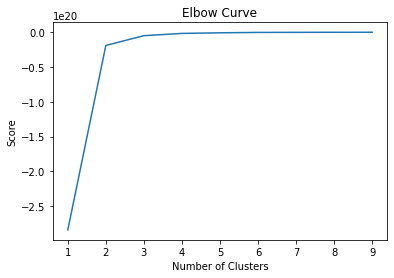

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Question 4: # of clusters to use:
The line seems to straighten out at 3 so I would say that the optimal count
for my clusters would be 3.


# Question 5 k-means algorithm

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/smw/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

# Question 6: New column

In [18]:
df['clusters'] = kmeans.fit_predict(df)

/Users/smw/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df.head()

,Confirmed,Deaths,Population,Total Cases,Total Deaths,Country Cases Death Rate,clusters
0,1,0,331198130,5032179,162804,0.038662,2
1,1,0,331198130,5032179,162804,0.038662,2
2,2,0,331198130,5032179,162804,0.038662,2
3,2,0,331198130,5032179,162804,0.038662,2
4,5,0,331198130,5032179,162804,0.038662,2


In [20]:
df['clusters'].value_counts()

0    2299
2     607
1     172
Name: clusters, dtype: int64

# Question 7: Create visualizations

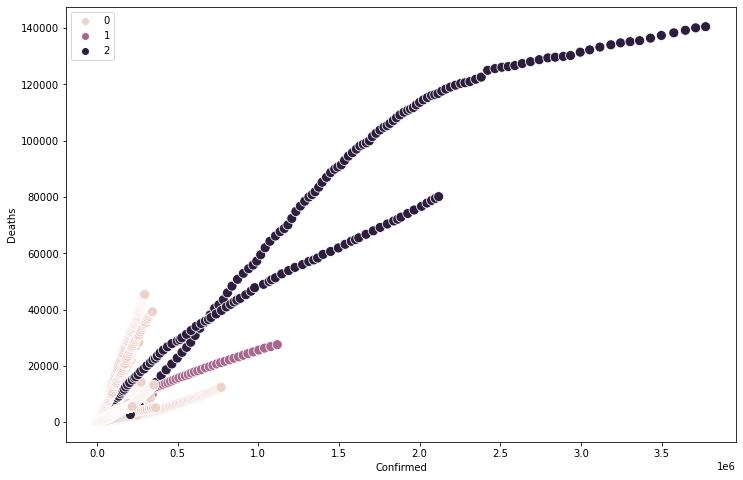

In [26]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Confirmed'], y=df['Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Confirmed') # Label x-axis.
plt.ylabel('Deaths') # Label y-axis.
plt.show()

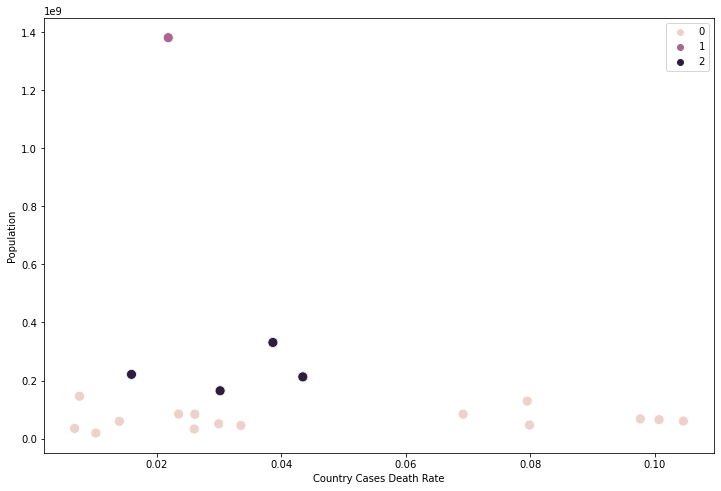

In [30]:
# Plot the clusters for the "Population" and "Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Country Cases Death Rate'], y=df['Population'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Country Cases Death Rate') 
plt.ylabel('Population') 
plt.show()

# Question 8: Discuss how and why the clusters make sense:
I don't think the clusters make all that much sense.  I can see that nearly all of the higher confirmed cases are with the dark purple color and that most of the much lower
case count is with the pink color.  Since there are only 20 countries being shown, the confirmed and death count is not really best with the clusters.  It may help if I showed
all of the countries on this chart so that the clusters may make more sense.

In [31]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

# Question 9: Descriptive statistics.

In [33]:
df.groupby('cluster').agg({'Confirmed':['mean', 'median'], 
                         'Deaths':['mean', 'median']})

Confirmed                 Deaths        
                      mean   median          mean  median
cluster                                                  
dark purple  466115.711697  59324.0  22259.258649  1262.0
pink         110707.418008  71686.0   7805.603306  1774.0
purple       176568.569767  25406.5   5028.825581   802.5

In [32]:
df.groupby('cluster').agg({'Confirmed':['mean', 'median'], 
                         'Deaths':['mean', 'median'], 
                         'Country Cases Death Rate':['mean', 'median'],
                          'Population':['mean', 'median']})

Confirmed                 Deaths          \
                      mean   median          mean  median   
cluster                                                     
dark purple  466115.711697  59324.0  22259.258649  1262.0   
pink         110707.418008  71686.0   7805.603306  1774.0   
purple       176568.569767  25406.5   5028.825581   802.5   

            Country Cases Death Rate              Population              
                                mean    median          mean      median  
cluster                                                                   
dark purple                 0.032470  0.038662  2.392678e+08   221295851  
pink                        0.049423  0.029964  6.830931e+07    60452568  
purple                      0.021860  0.021860  1.381345e+09  1381344997

It is interesting to look at the comparison of mean and median for both Confirmed and Deaths especially between dark purple and pink.  The Confirmed mean for dark purple is far higher than pink, but the median is actually higher for pink.  It is the same case for Deaths as well.  This shows that there is a far wider range of numbers for dark purple for both Confirmed and Deaths, and pink has a much smaller range of numbers.  Purple sits somewhere in between for both.  

# Question 10: Usefulness in future steps of analytics pipeline
I could see how using this method may help unlock patterns that may not be so readily apparent at first glance.  In my case, it did not really do so.  To see these in clusters could help see connections that may not be prevelant when showing only one variable alone. 